In [1]:
import numpy as np
import pandas as pd


from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier 
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

from zodiac.zodiac import Zodiac

### Load the data and store the train and test labels seperately

In [2]:
test = pd.read_csv('./../../data/mnist_test.csv')
train = pd.read_csv('./../../data/mnist_train.csv')

In [3]:
train_x = train['label']
del train['label']
res = np.array(test["label"])
del test["label"]

### Train your models, for our experiments we will be trying 

### 1) Random Forests 

In [4]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train, train_x) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [5]:
RF_pred = clf.predict(test)

In [6]:
print(classification_report(res,RF_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.93      0.95      0.94      1032
           3       0.92      0.95      0.93      1010
           4       0.94      0.95      0.95       982
           5       0.94      0.91      0.92       892
           6       0.96      0.96      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.91      0.92       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



### 2) Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
NB_pred = gnb.fit(train, np.array(train_x)).predict(test)

In [8]:
print(classification_report(res,NB_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



### Using Zodiac to visualize model performance with grids

In [9]:
#initialize zodiac with data values and model predictions

RF_zod = Zodiac(train_data=train,test_data=test,test_labels=res, 
             test_predictions=RF_pred, model_type="multiclass",dim_red="PCA") 


NB_zod = Zodiac(train_data=train,test_data=test,test_labels=res, 
             test_predictions=NB_pred, model_type="multiclass",dim_red="PCA")

In [10]:
#Set metrics
RF_zod.set_metrics(metrics=["f1","accuracy","recall","precision"],average="macro")

NB_zod.set_metrics(metrics=["f1","accuracy","recall","precision"],average="macro")

Setting metrics..
Metrics set
Setting metrics..
Metrics set


In [11]:
#generate manual grids
RF_zod.split_manual_grid(h=100)

NB_zod.split_manual_grid(h=100)

Splitting the data into grids...
Generating density matrix...
Completed
Splitting the data into grids...
Generating density matrix...
Completed


<Figure size 432x288 with 0 Axes>

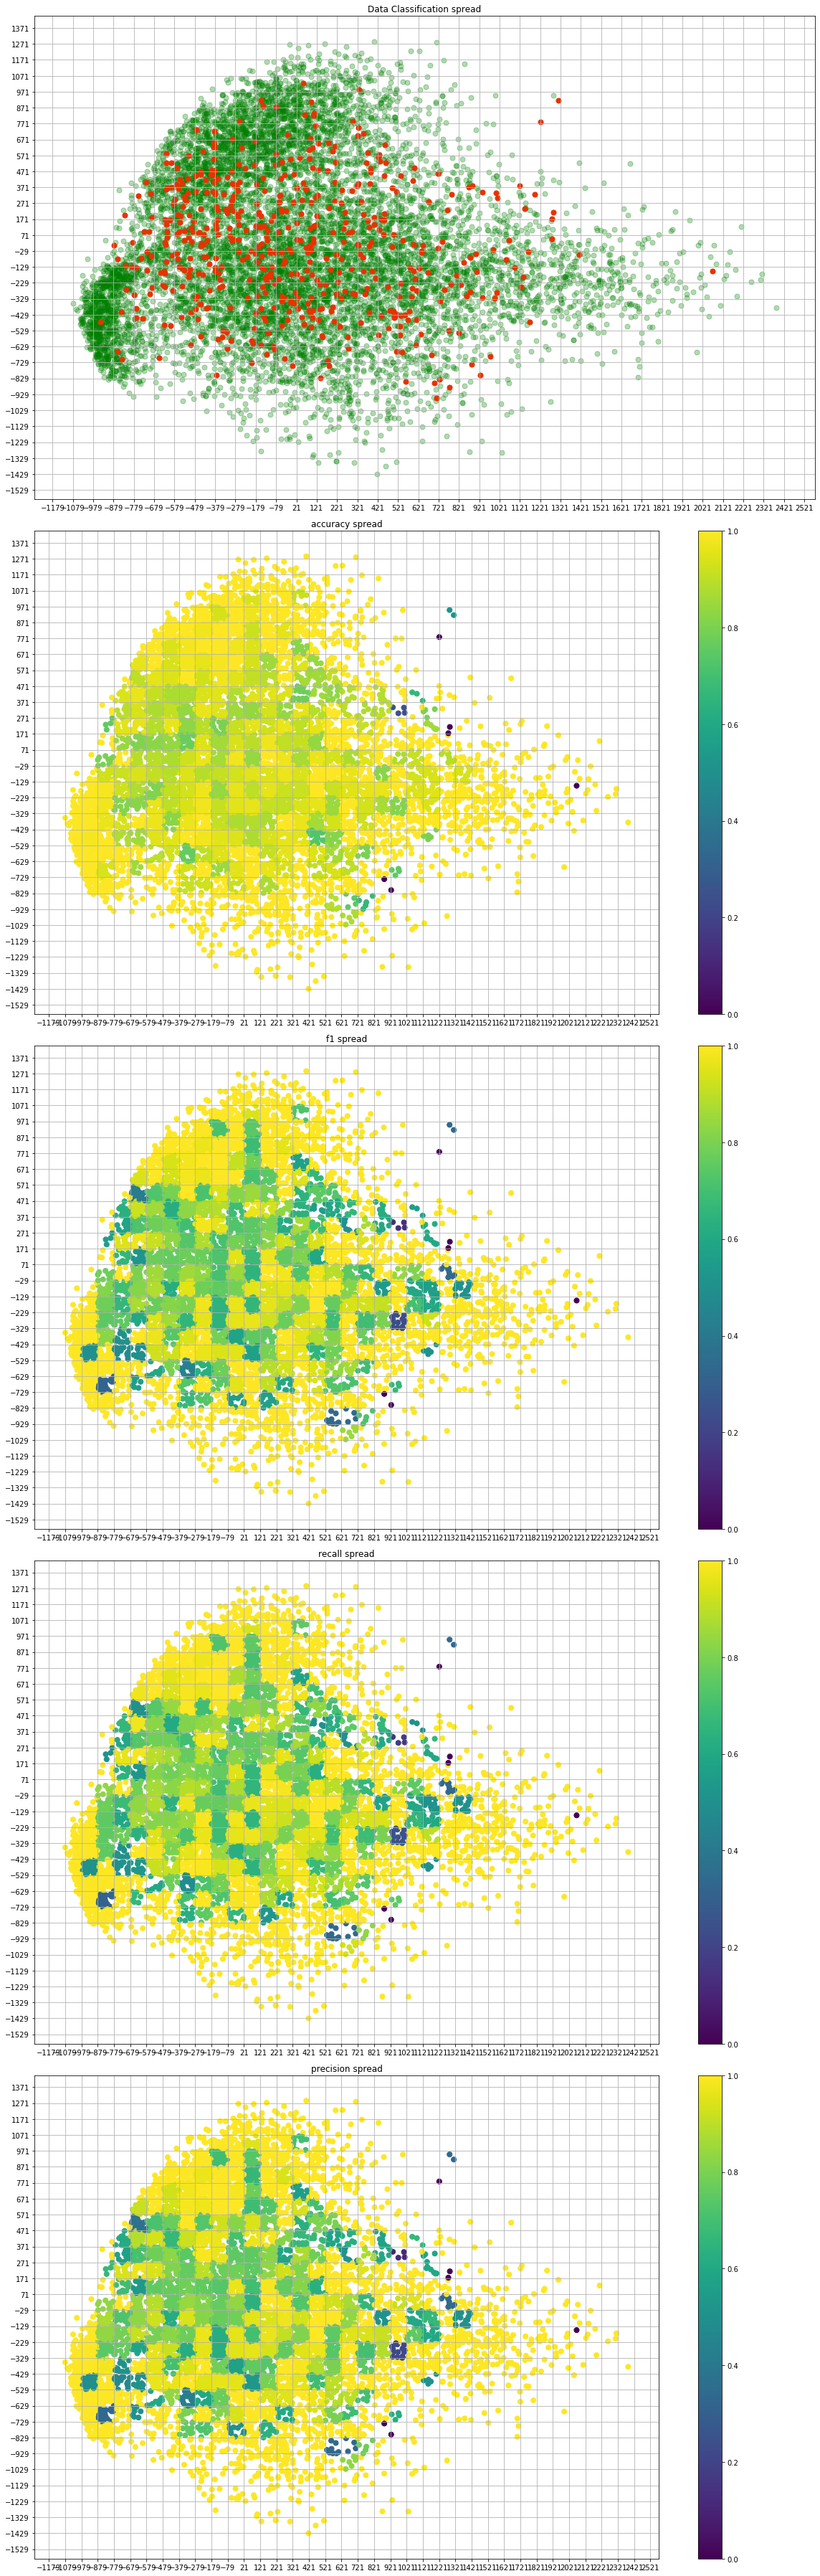

In [12]:
#Random forest plot
RF_zod.split_plot(metrics=["accuracy","f1","recall","precision"])  #pass only the metrics you want to visualize

<Figure size 432x288 with 0 Axes>

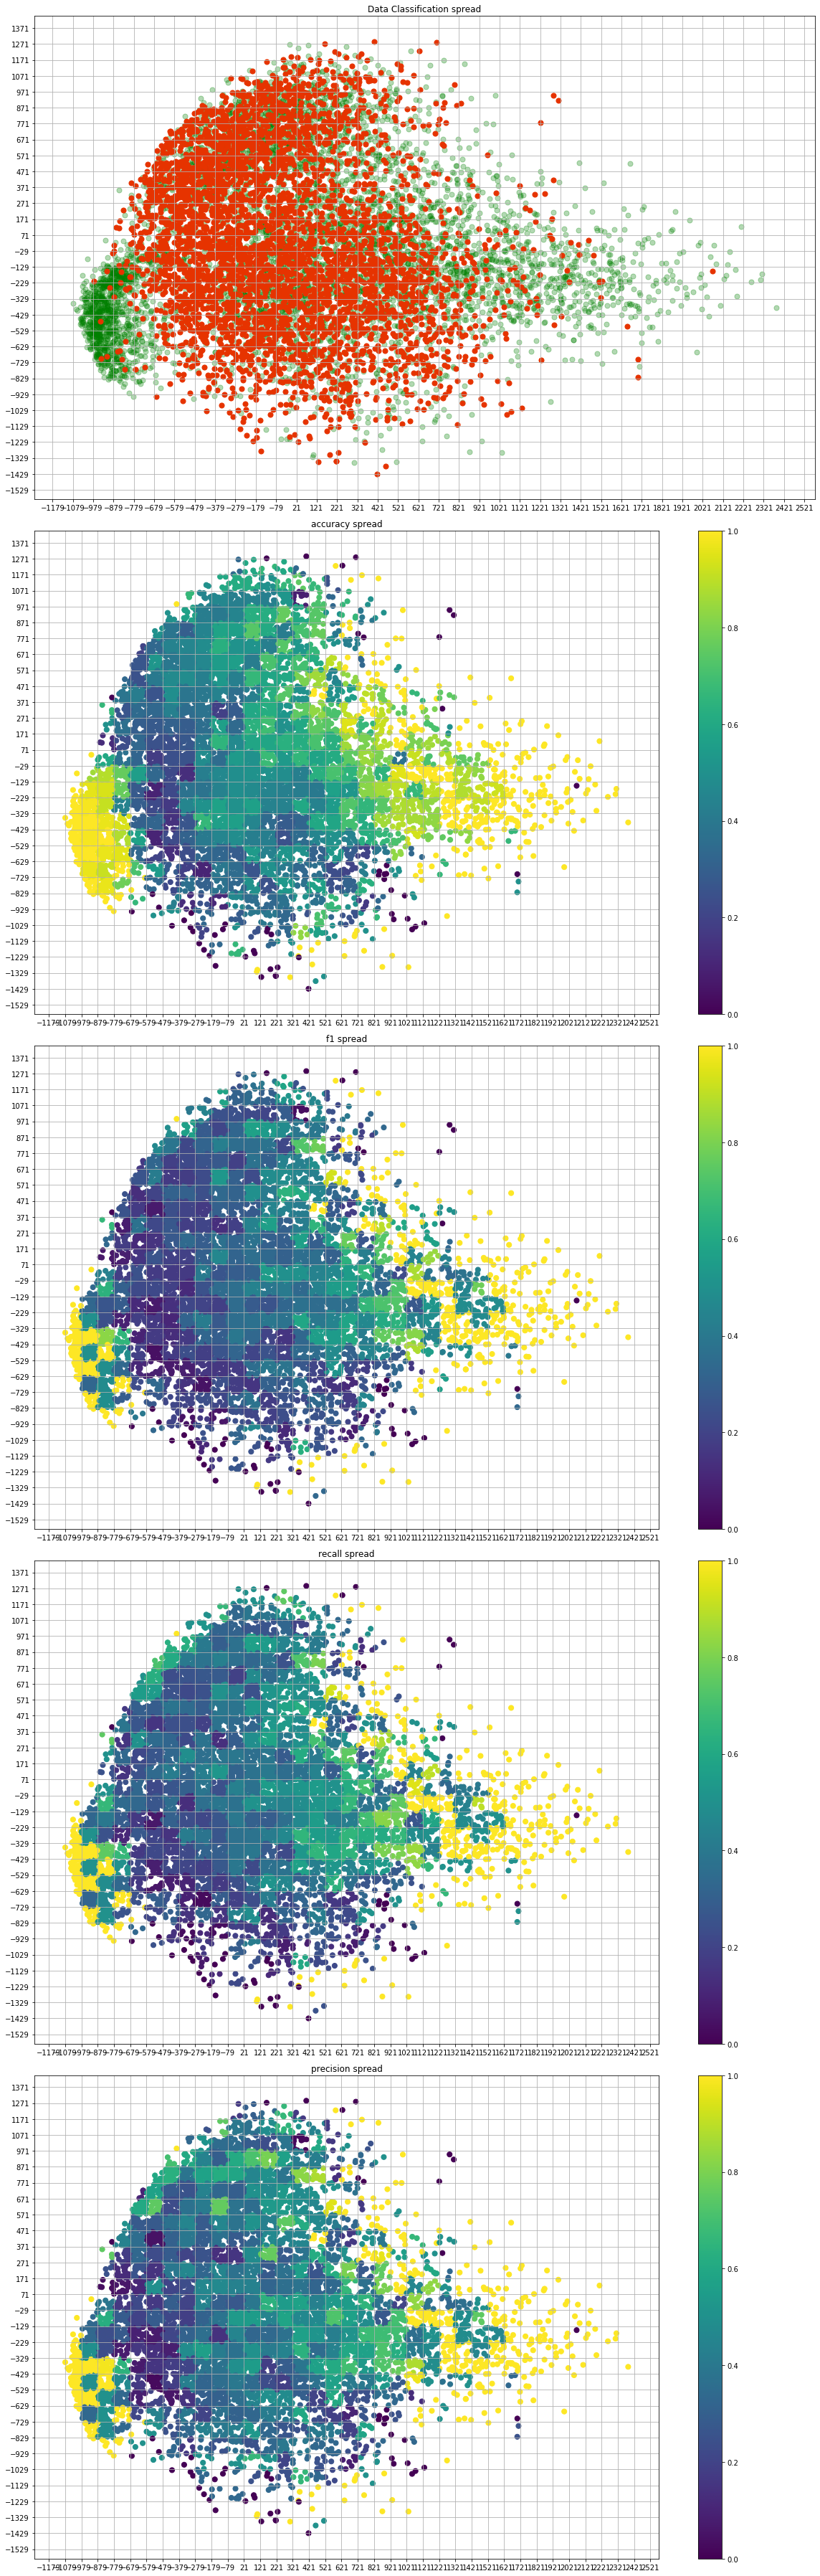

In [13]:
#Random forest plot
NB_zod.split_plot(metrics=["accuracy","f1","recall","precision"])

### Using zodiac to visualize model performance with parzen windows

In [14]:
#Generate parzen windows
RF_zod.gen_parzen(radius = 100)

NB_zod.gen_parzen(radius = 100)

Generating parzen windows...
Completed.
Generating parzen windows...
Completed.


<Figure size 432x288 with 0 Axes>

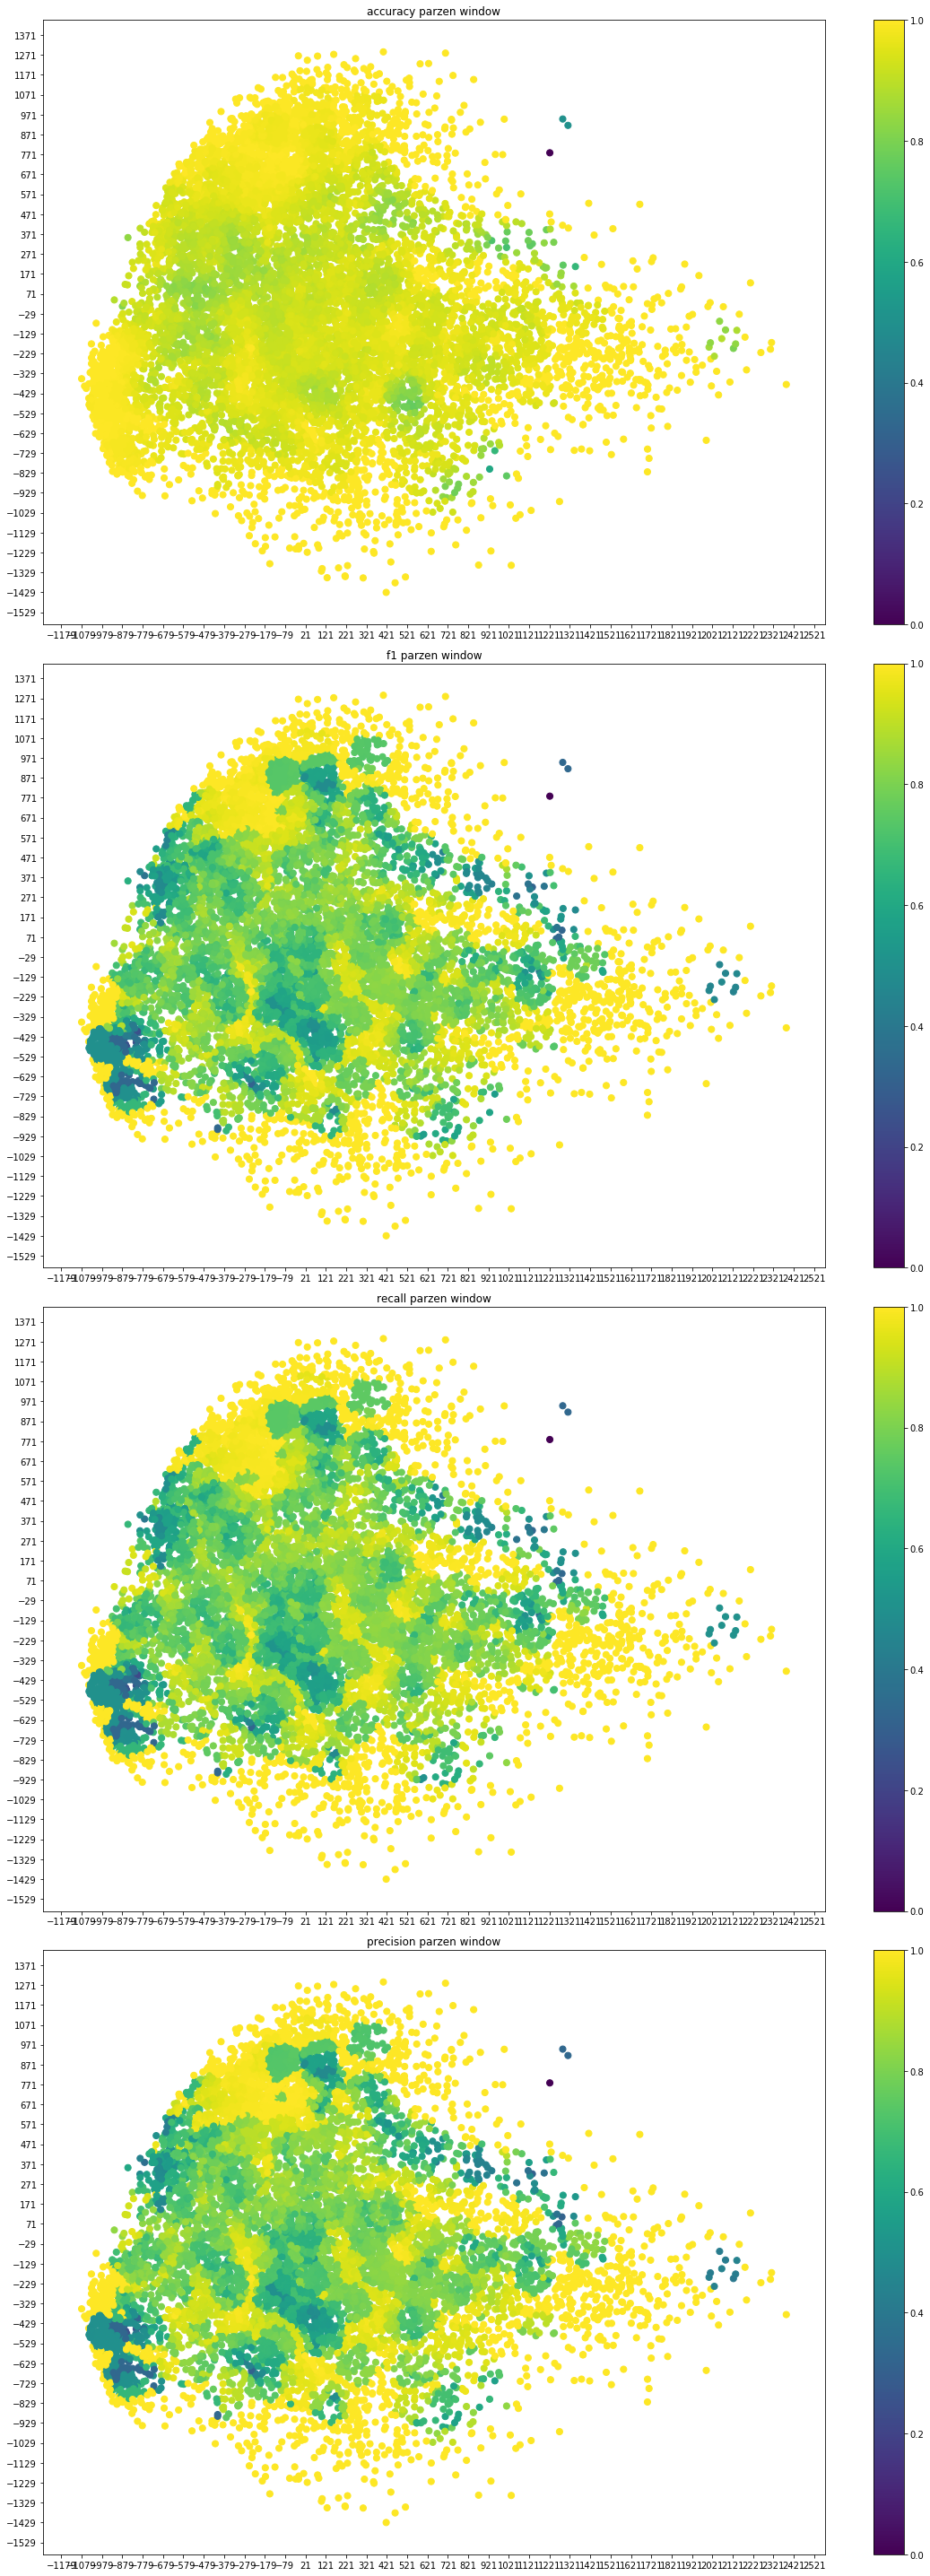

In [15]:
#Random forest plots
RF_zod.parzen_plot(metrics=["accuracy","f1","recall","precision"]) #pass only the metrics you want to visualize

<Figure size 432x288 with 0 Axes>

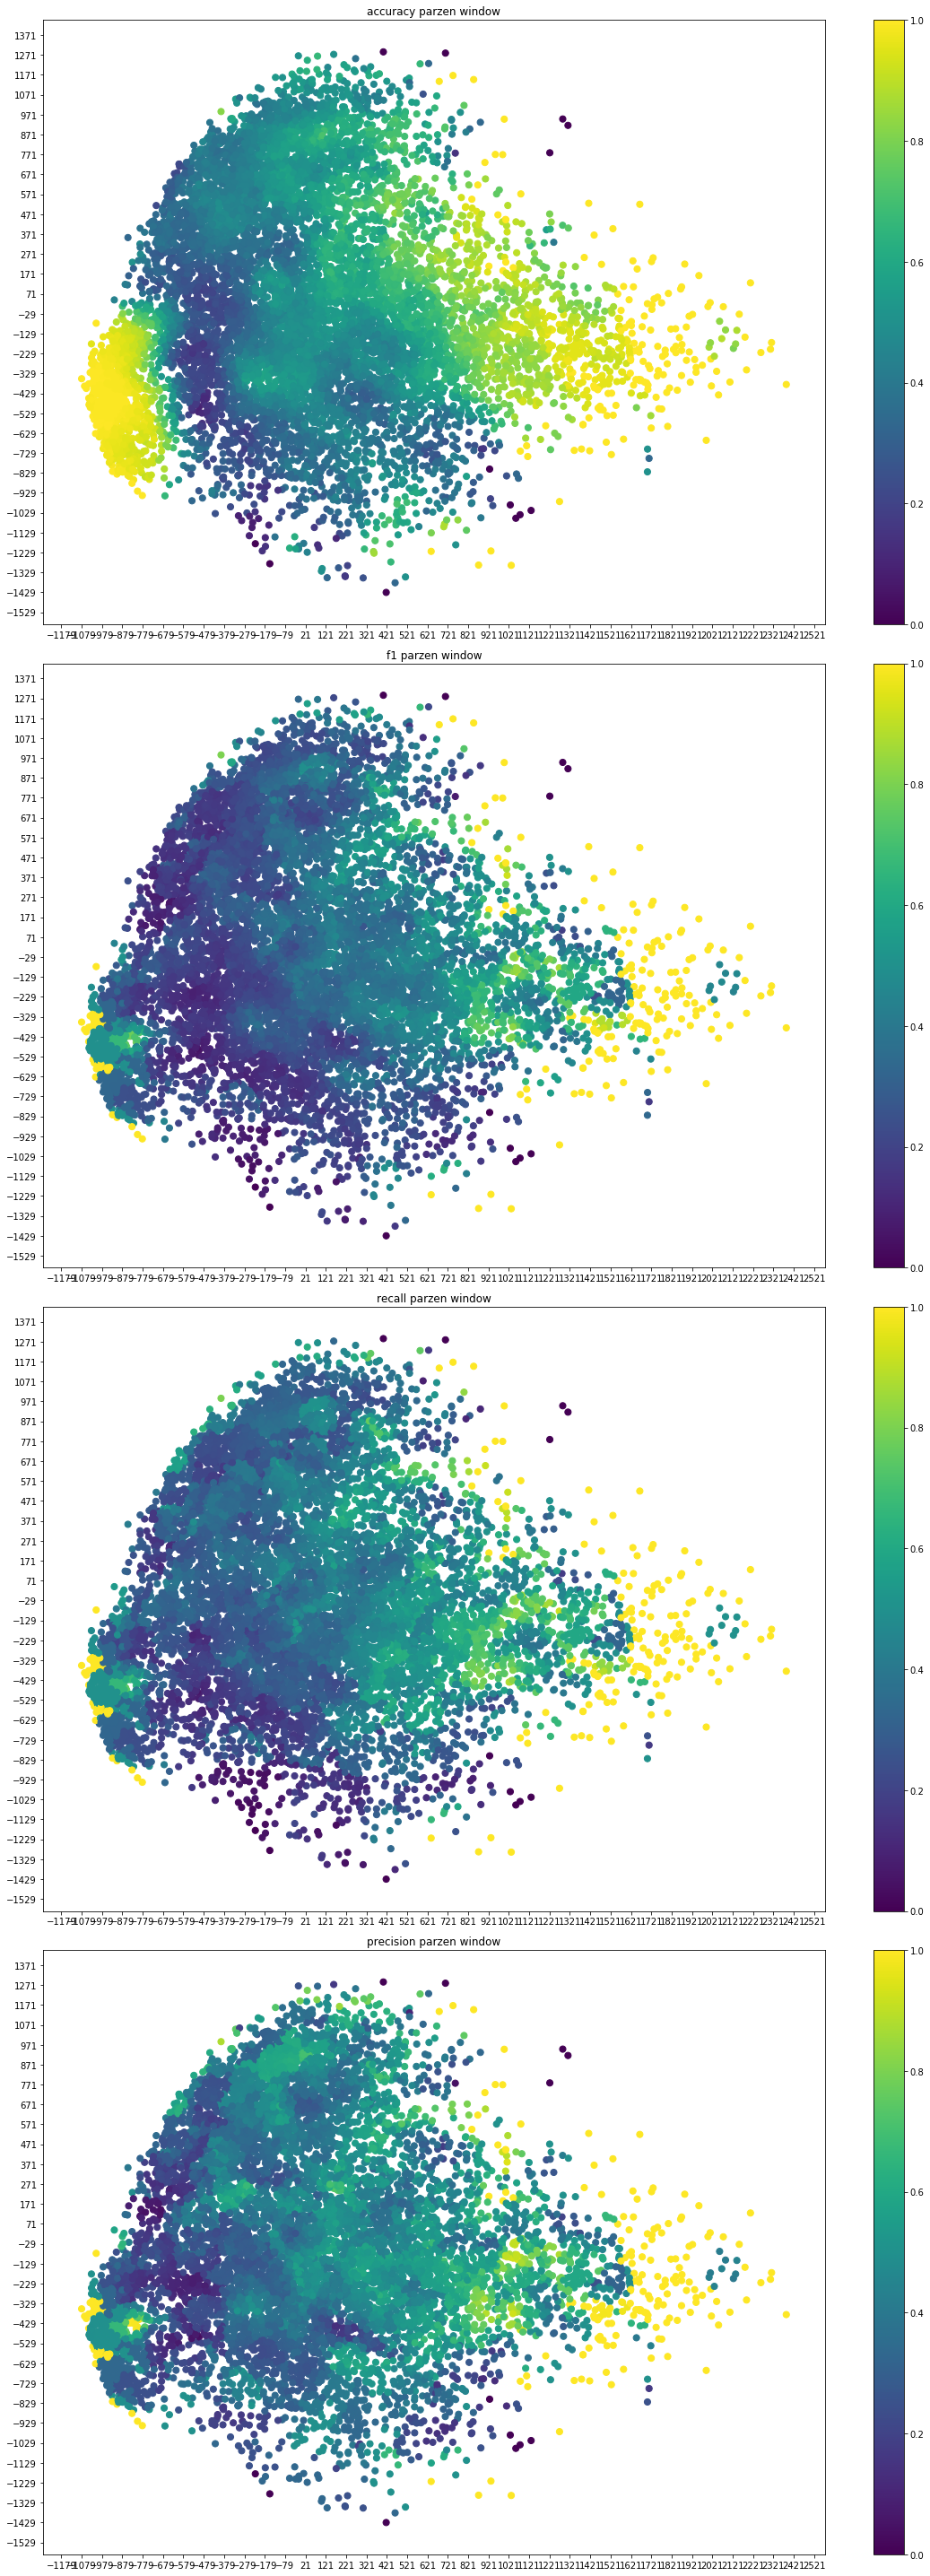

In [16]:
#XGB parzen plots
NB_zod.parzen_plot(metrics=["accuracy","f1","recall","precision"])